# Interactive Muon PDF Exploration

_Author: Tamás Gál - tgal@km3net.de_

The following example shows how to create an interactive muon PDF plot using `Jpp` and `jppy`.

To install the dependencies run the following commands:

    export JPP_DIR=/path/to/jpp
    pip install jppy jupyterlab ipywidgets numpy matplotlib

In [1]:
import os
import ipywidgets as iw
import matplotlib.pyplot as plt
import numpy as np
import jppy

print(f"jppy version: {jppy.version}")

jppy version: 3.1.1


In [2]:
muon_pdf = jppy.pdf.JMuonPDF(os.path.expandvars("$JPP_DIR/data/J%p.dat"), TTS=0)
xs = np.linspace(-20, 500, 1000)

In [3]:
opts = dict(continuous_update=False)
@iw.interact
def show_pdf(E=iw.FloatLogSlider(min=1, max=5, step=0.1, value=3, base=10, **opts),
             R=iw.IntSlider(min=1, max=200, step=1, value=50, **opts),
             theta=iw.FloatSlider(min=0, max=np.pi, step=0.1, value=0, **opts),
             phi=iw.FloatSlider(min=0, max=np.pi, step=0.1, value=0, **opts)):
    pdf = lambda t_: muon_pdf.calculate(E, R, theta, phi, t_).f
    ys = list(map(pdf, xs))
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(xs, ys)
    ax.set_xlabel('t / ns', fontsize=15)
    ax.set_ylabel(r'$\frac{dP}{dt}~/~($npe$~$ns$^{-1})$', fontsize=15)
    ax.set_ylim((1e-8, 1e-2))
    ax.set_yscale("log")
    plt.grid()
    ax.set_title(r'$E = {:.0f}~GeV, R = {}~m, \theta = {}, \phi = {}$'.format(
            E, R, theta, phi))

interactive(children=(FloatLogSlider(value=10.0, continuous_update=False, description='E', max=5.0, min=1.0), …

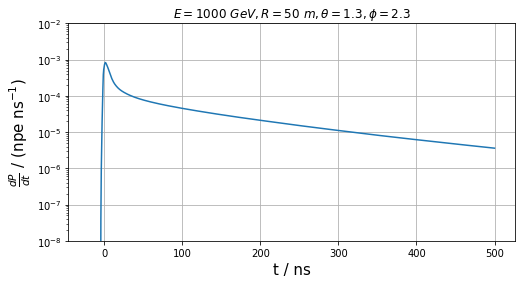

In [4]:
show_pdf(1e3, 50, 1.3, 2.3)